## Desafio XP

**Candidato:** Aron Ifanger Maciel <br>
**email:** aronifanger@gmail.com <br>
**cel:** (12) 9 8113 3445

### Leitura dos dados

In [1]:
import pandas as pd

pessoas = pd.read_csv("_pessoas.csv")
train = pd.read_csv("_transacao_train.csv")
test = pd.read_csv("_transacao_test.csv")

### Nome dos campos

In [12]:
print("Cadastro:", pessoas.columns)
print("Transação (treino):", train.columns)
print("Transação (teste):", test.columns)

Cadastro: Index(['ID', 'var1', 'grupo', 'var2', 'data', 'var3', 'var4', 'var5', 'var6',
       'var7', 'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14',
       'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22',
       'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29', 'var30',
       'var31', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37', 'var38'],
      dtype='object')
Transação (treino): Index(['ID', 'data', 'categoria', 'var10', 'retorno'], dtype='object')
Transação (teste): Index(['ID', 'data', 'categoria', 'var10'], dtype='object')


### Quantidade de nulos

In [13]:
print("Cadastro:", pessoas.isnull().sum().sum())
print("Transação (treino):", train.isnull().sum().sum())
print("Transação (teste):", test.isnull().sum().sum())

Cadastro: 0
Transação (treino): 0
Transação (teste): 0


### Visualização das distribuições das variáveis transacionais

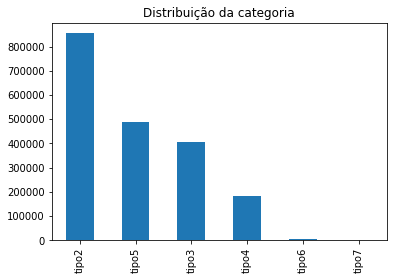

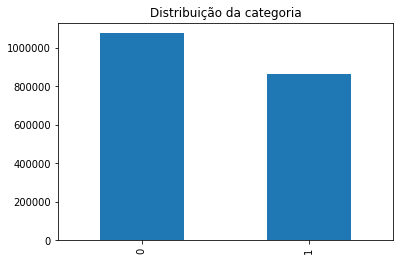

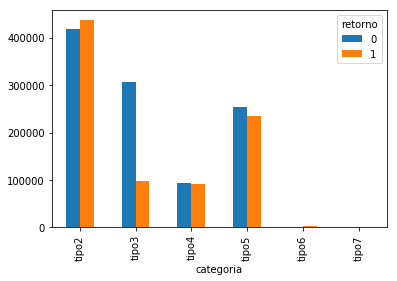

In [66]:
%matplotlib inline
from matplotlib import pyplot as plt

train.categoria.value_counts().plot.bar(title="Distribuição da categoria")
plt.show()

train.retorno.value_counts().plot.bar(title="Distribuição da categoria")
plt.show()

train.groupby(["categoria", "retorno"], as_index=False).agg({"var10":"count"})\
    .pivot(index='categoria', columns="retorno", values="var10").plot.bar()
plt.show()

#### Observações

- A coluna 'categoria' está desbalanceada, entretando pelo menos 4 classes estão bem representadas;
- A coluna 'resultado', que é o objetivo da análise, possui duas classes e está quase equlibrada. Provavelmente isto não será um problema na utilização de um classificador para fazer as previsões;
- A distribuição das categorias para cada valor da coluna resultados é muito parecida, exceto pela categoria 'tipo3' que é significativamente diferente para os resultados 0 e 1. Esta categoria pode ser determinante na previsão do resultado;

### Visualização dos dados cadastrais

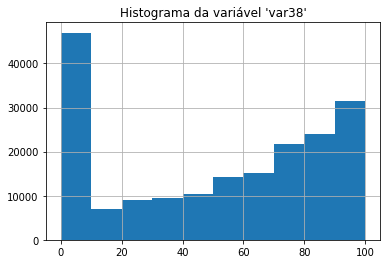

Resumo das categorias de cada variável
Variável var1
Quantidade de classes: 2
Distribuição:
tipo2    0.919357
tipo1    0.080643
Name: var1, dtype: float64 

Variável grupo
Quantidade de classes: 34224
Distribuição:
group 17304    0.408814
group 667      0.008132
group 8386     0.005531
group 9280     0.003522
group 450      0.003485
Name: grupo, dtype: float64 

Variável var2
Quantidade de classes: 3
Distribuição:
tipo3    0.510544
tipo2    0.408814
tipo1    0.080643
Name: var2, dtype: float64 

Variável var3
Quantidade de classes: 43
Distribuição:
tipo40    0.335558
tipo4     0.148537
tipo5     0.073890
tipo2     0.070818
tipo11    0.058308
Name: var3, dtype: float64 

Variável var4
Quantidade de classes: 25
Distribuição:
tipo25    0.335558
tipo6     0.237614
tipo2     0.080463
tipo5     0.076164
tipo7     0.070057
Name: var4, dtype: float64 

Variável var5
Quantidade de classes: 9
Distribuição:
tipo9    0.335558
tipo5    0.152793
tipo4    0.150477
tipo2    0.116885
tipo8    0.058894


In [73]:
pessoas.var38.hist()
plt.title("Histograma da variável 'var38'")
plt.show()

variaveis_cadastrais = ['var1', 'grupo', 'var2', 'var3', 'var4', 'var5', 'var6',
                        'var7', 'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14',
                        'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22',
                        'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29', 'var30',
                        'var31', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37']

print("Resumo das categorias de cada variável")

for v in variaveis_cadastrais:
    print("Variável %s"% v)
    dist = pessoas[v].value_counts()
    print("Quantidade de classes: %d"% len(dist))
    print("Distribuição:")
    print(dist[:5] / pessoas.shape[0], "\n")

### Junção dos dados

In [210]:
dataset = pessoas.set_index("ID").join(train.set_index("ID"), lsuffix='_cad', rsuffix='_trans')
dataset = dataset[dataset.retorno.notnull()]

In [211]:
variaveis_categoricas = ["var1","grupo","var2","var3","var4","var5","var6","var7","var8","var9","categoria","var10_trans"]

for v in variaveis_categoricas:
    dataset[v] = dataset[v].astype("category")
    
dataset[variaveis_categoricas] = dataset[variaveis_categoricas].apply(lambda x: x.cat.codes)

In [212]:
variaveis = ['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10_cad', 'var10_trans', 
             'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 
             'var22', 'var23', 'var24', 'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32', 
             'var33', 'var34', 'var35', 'var36', 'var37', 'var38','categoria', 'grupo', 'retorno']

datas = ['data_cad', 'data_trans']

### Primeira tentativa: classificação utilizando todo o histórico

In [213]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset[variaveis], test_size=0.7)

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression()
clf.fit(train_dataset[variaveis[:-1]], train_dataset[variaveis[-1]])

C:\Users\aroni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [215]:
from sklearn.metrics import classification_report

print("Train")
print(classification_report(clf.predict(train_dataset[variaveis[:-1]]), train_dataset[variaveis[-1]]))
print("Test")
print(classification_report(clf.predict(test_dataset[variaveis[:-1]]), test_dataset[variaveis[-1]]))

Train
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83    257346
         1.0       0.94      0.75      0.84    324556

   micro avg       0.84      0.84      0.84    581902
   macro avg       0.85      0.85      0.84    581902
weighted avg       0.86      0.84      0.84    581902

Test
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83    599519
         1.0       0.94      0.75      0.84    758255

   micro avg       0.84      0.84      0.84   1357774
   macro avg       0.85      0.85      0.84   1357774
weighted avg       0.86      0.84      0.84   1357774



## Importância das variáveis

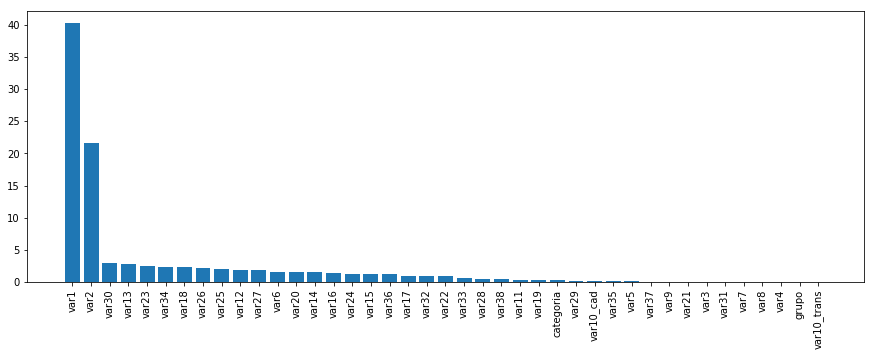

In [216]:
from matplotlib import pyplot as plt
import numpy as np

feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
order = np.argsort(-feature_importance)

plt.figure(figsize=(15,5))
plt.bar(x=np.array(variaveis)[order], height=feature_importance[order])
plt.xticks(rotation='vertical')
plt.show()

## Comparação das classes da variável 'var1' entre os retornos possíveis

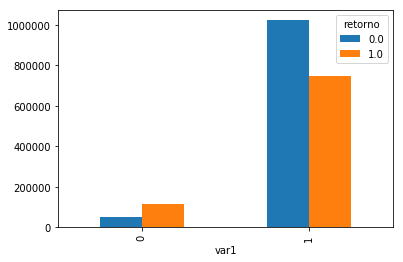

In [217]:
dataset.groupby(["var1", "retorno"], as_index=False).agg({"grupo":"count"})\
    .pivot(index='var1', columns="retorno", values="grupo").plot.bar()
plt.title = "Distribuicao da variável var1"
plt.show()

## Comparação das classes da variável 'var2' entre os retornos possíveis

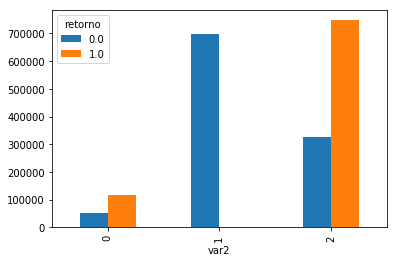

In [218]:
dataset.groupby(["var2", "retorno"], as_index=False).agg({"grupo":"count"})\
    .pivot(index='var2', columns="retorno", values="grupo").plot.bar()
plt.title = "Distribuicao da variável var2"
plt.show()

In [219]:
## Comparação das classes da variável 'var6' entre os retornos possíveis

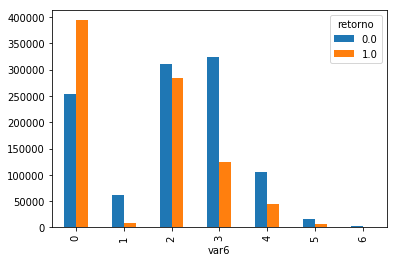

In [220]:
dataset.groupby(["var6", "retorno"], as_index=False).agg({"grupo":"count"})\
    .pivot(index='var6', columns="retorno", values="grupo").plot.bar()
plt.title = "Distribuicao da variável var2"
plt.show()

### Considerações da primeira tentativa

- Como o conjunto de dados é grande, a primeira tentativa utiliza um algoritmo simples e uma conversão categórico-numérico que faz um mapeamento entre cada categoria do dataset para um inteira, pois utiliza pouca memória;
- A conversão categórico-numérico introduz uma ordem que na prática não existe, portanto a próxima tentativa utilizará a estratégia one-hot-encoding;
- A presença de muitas categorias nas colunas categóricas faz com que a transformação one-hot-encoding utilize muita memória, por isto é interessante diminuir o número de categorias a fim de fazer um melhor uso da memória;
- A primeira versão do modelo apresentou um resultado relativamente bom (embora seja difícil afirmar, pois não se sabe a natureza dos dados e nem o objetivo de negócio da análise) e isto já permite saber quais foram as variáveis mais importantes para o modelo, o que pode ser usado como seletor de variáveis;

## Segunda tentativa: utilização de one-hot-encoding e variáveis selecionadas pelo modelo anterior

OBS: A variável 'categoria' foi incluida 'manualmente', pois ela pode ter sido influenciada pela conversão de tipo e o gráfico da distribuição apresentado inicialmente sugeria que esta variável pode ser útil para a classificação

In [221]:
order = np.argsort(-feature_importance)

# Corte pelas variáveis que representam 95% da importância total + o retorno
ft = list(feature_importance[order].cumsum() < 95)

novas_variaveis = list(np.array(variaveis)[order][ft]) + ['categoria','retorno']

#### Liberando memória

In [222]:
del dataset
del train_dataset
del test_dataset

In [223]:
dataset2 = pessoas.set_index("ID").join(train.set_index("ID"), lsuffix='_cad', rsuffix='_trans')
dataset2 = dataset2[dataset2.retorno.notnull()][novas_variaveis]

In [230]:
list(dataset2.columns)
dataset2.head()

,var1,var2,var30,var13,var23,var34,var18,var26,var25,var12,var27,var6,var20,var14,var16,var24,var15,var36,var17,var32,categoria,retorno
ID,,,,,,,,,,,,,,,,,,,,,,
cli_100,tipo2,tipo2,True,True,False,True,False,False,False,False,True,tipo3,False,True,True,False,False,True,False,False,tipo2,0.0
cli_100,tipo2,tipo2,True,True,False,True,False,False,False,False,True,tipo3,False,True,True,False,False,True,False,False,tipo2,0.0
cli_100002,tipo2,tipo3,True,True,True,True,False,True,True,True,True,tipo3,False,False,False,False,False,True,True,True,tipo2,1.0
cli_100002,tipo2,tipo3,True,True,True,True,False,True,True,True,True,tipo3,False,False,False,False,False,True,True,True,tipo2,1.0
cli_100003,tipo2,tipo3,False,True,True,True,False,True,True,True,True,tipo2,False,True,False,True,True,True,True,True,tipo4,1.0


In [227]:
dataset2_dummy = pd.get_dummies(dataset2[["var1", "var2", "var6", "categoria"]]) == 1

## Conversão para matrix (problemas com o join usando dataframes)

In [233]:
x1 = dataset2_dummy.values.astype("int")

variaveis_originais = list(dataset2.columns)
variaveis_originais.remove("var1")
variaveis_originais.remove("var2")
variaveis_originais.remove("var6")
variaveis_originais.remove("categoria")

x2 = dataset2[variaveis_originais].values.astype("int")

variaveis = list(dataset2_dummy.columns) + variaveis_originais

x = np.concatenate([x1,x2], axis=1)

x1.shape, x2.shape, x.shape

((1939676, 18), (1939676, 18), (1939676, 36))

In [234]:
train_matrix, test_matrix = train_test_split(x, test_size=0.7)

In [235]:
clf = LogisticRegression()
clf.fit(train_matrix[:,:-1], train_matrix[:,-1])

C:\Users\aroni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [236]:
print("Train")
print(classification_report(clf.predict(train_matrix[:,:-1]), train_matrix[:,-1]))
print("Test")
print(classification_report(clf.predict(test_matrix[:,:-1]), test_matrix[:,-1]))

Train
              precision    recall  f1-score   support

           0       0.76      0.96      0.85    256677
           1       0.96      0.76      0.85    325225

   micro avg       0.85      0.85      0.85    581902
   macro avg       0.86      0.86      0.85    581902
weighted avg       0.87      0.85      0.85    581902

Test
              precision    recall  f1-score   support

           0       0.76      0.96      0.85    598364
           1       0.96      0.76      0.85    759410

   micro avg       0.85      0.85      0.85   1357774
   macro avg       0.86      0.86      0.85   1357774
weighted avg       0.87      0.85      0.85   1357774



### Importância das variáveis do modelo 2

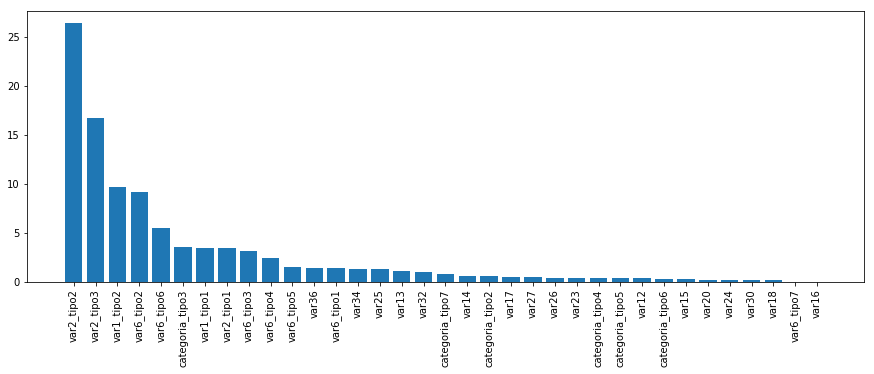

In [237]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
order = np.argsort(-feature_importance)

plt.figure(figsize=(15,5))
plt.bar(x=np.array(variaveis[:-1])[order], height=feature_importance[order])
plt.xticks(rotation='vertical')
plt.show()

### Considerações da segunda tentativa

- Houve um pequeno aumento na medida f1
- As variáveis var1 e var2 permaneceram no topo das mais importantes;
- A variável 'categoria' foi a sexta mais importante, entretanto apenas a categora 'tipo3' ficou entre as primeiras e as demais se distribuíram entre as demais, o que confirma a expectativa inicial;

## Predição do conjunto de teste

In [263]:
dataset_final = pessoas.set_index("ID").join(test.set_index("ID"), lsuffix='_cad', rsuffix='_trans')
dataset_teste_final = dataset_final[novas_variaveis[:-1]]

In [259]:
dataset_teste_final_dummy = pd.get_dummies(dataset_teste_final[["var1", "var2", "var6", "categoria"]]) == 1

In [260]:
x1_teste = dataset_teste_final_dummy.values.astype("int")

variaveis_originais = list(dataset_teste_final.columns)
variaveis_originais.remove("var1")
variaveis_originais.remove("var2")
variaveis_originais.remove("var6")
variaveis_originais.remove("categoria")

x2_teste = dataset_teste_final[variaveis_originais].values.astype("int")

variaveis = list(dataset_teste_final_dummy.columns) + variaveis_originais

x_teste = np.concatenate([x1_teste, x2_teste], axis=1)

x1_teste.shape, x2_teste.shape, x_teste.shape

((261159, 18), (261159, 17), (261159, 35))

In [261]:
predicoes = clf.predict(x_teste)

In [265]:
list(test.columns)

['ID', 'data', 'categoria', 'var10']

In [266]:
resposta = dataset_final[['data_trans', 'categoria', 'var10_trans']].reset_index()

In [267]:
resposta["resultado_pred"] = predicoes

In [270]:
resposta.columns = ['ID', 'data', 'categoria', 'var10', 'resultado_pred']

In [271]:
resposta.to_csv('_resposta.csv')